<a href="https://colab.research.google.com/github/lis-r-barreto/ml-case-studies/blob/main/01_classificacao_multiclasse_iris_estudo_comparativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação Multiclasse com o Dataset Iris: Um Estudo Comparativo**

## **0. Setup Inicial**

In [15]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

## **1. Introdução**

Este notebook explora o desempenho de diferentes algoritmos de classificação no clássico *dataset* Iris, comparando sua eficácia em um problema de classificação multiclasse.

O *dataset* Iris foi utilizado no artigo de R.A. Fisher (1936) e está disponível no Repositório de *Machine Learning* da UCI. Ele contém 150 amostras de três espécies de íris, cada uma descrita por quatro características:

- **SepalLengthCm** (Comprimento da sépala)  
- **SepalWidthCm** (Largura da sépala)  
- **PetalLengthCm** (Comprimento da pétala)  
- **PetalWidthCm** (Largura da pétala)  
- **Species** (Espécie da flor)

Uma das espécies é linearmente separável das outras duas, que, por sua vez, não são separáveis entre si.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flores_de_%C3%8Dris.png/1920px-Flores_de_%C3%8Dris.png" alt="Iris Dataset" width="600"/>

Testaremos os seguintes algoritmos:

- **Regressão Logística** – Modelo linear clássico para classificação.
- **K-Nearest Neighbors (KNN)** – Classificação baseada na proximidade dos vizinhos mais próximos.
- **Árvore de Decisão** – Modelo baseado em regras de decisão.
- **Support Vector Machine (SVM)** – Busca o melhor hiperplano para separar as classes.
- **Redes Neurais** – Modelos Perceptron e MLP (*Multilayer Perceptron*).

Os modelos serão comparados usando métricas como acurácia, precisão, revocação e F1-score. Ao final, analisaremos os resultados e identificaremos a abordagem mais eficaz para este problema.

## **2. Metodologia**

Neste projeto, adotaremos a metodologia **CRISP-DM** (*Cross Industry Standard Process for Data Mining*), um dos frameworks mais utilizados em projetos de ciência de dados.

<img src="https://cdn.prod.website-files.com/625af9ac050b6e6379b3c444/6791115bc23efadebc44f017_6480acb9f030976b53cf48bd_1-crisp-dm-as-etapas-da-metodologia.png" alt="CRISP-DM" width="500"/>

🔗 Saiba mais: [Entenda o CRISP-DM](https://www.preditiva.ai/blog/entenda-o-crisp-dm-suas-etapas-e-como-de-fato-gerar-valor-com-essa-metodologia)

Como o *dataset* **Iris** já está estruturado e amplamente estudado, **as fases de "Business Understanding" e "Data Understanding" já foram concluídas**. Dessa forma, daremos continuidade a partir da etapa de **Preparação dos Dados**, realizando:

- Normalização ou padronização (se necessário);  
- Transformação e codificação de variáveis;  
- Divisão dos dados em treino e teste.  

Na fase de **Modelagem**, aplicaremos diferentes algoritmos de aprendizado de máquina, avaliando o desempenho com métricas como **acurácia, precisão, revocação e F1-score**. A etapa de **Avaliação** nos permitirá comparar os modelos e identificar a abordagem mais eficaz.

Embora a **implantação (Deployment)** não seja o foco deste estudo, a análise contribuirá para entender qual modelo poderia ser utilizado em uma aplicação real.



## **3. Preparação dos Dados**



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)


# Carregando o conjunto de dados CSV em um DataFrame
df = pd.read_csv(f"{path}/Iris.csv")
df.head()

100%|██████████| 3.60k/3.60k [00:00<00:00, 4.23MB/s]

Extracting files...
Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/uciml/iris/versions/2


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ["id","sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Separando as features (X) e a classe (y)
x = df[["sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width"]]
y = df["species"]

## **4. Modelagem**

### **4.1. Regressão Logística**

In [4]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
def split_data(x, y, test_size=0.3, random_state=42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(x, y)

In [5]:
# Criando e treinando o modelo de Regressão Logística
def logistic_regression_predict(x_train, y_train):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    # Fazendo previsões sobre o conjunto de dados de teste
    y_pred = model.predict(x_test)
    return y_pred

y_pred = logistic_regression_predict(x_train, y_train)

In [6]:
# Calculando métricas de desempenho (acurácia, precisão, revocação e F1-Score)

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    return metrics

print(calculate_metrics(y_test, y_pred))

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


### **4.2. KNN**

In [7]:
def knn_predict(x_train, y_train):
    # Criando e treinando o modelo KNN com K=3 vizinhos
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_train, y_train)

    # Fazendo previsões sobre o conjunto de dados de teste
    y_pred = model.predict(x_test)
    return y_pred

y_pred = knn_predict(x_train, y_train)

print(calculate_metrics(y_test, y_pred))

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


In [8]:
# Relação da acurácia com a quantidade de vizinhos
number_neighbors = range(1, 106)
accuracy_dict = dict()

for i in number_neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    accuracy_dict[i] = accuracy_score(y_test, y_pred)

print(accuracy_dict)

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 0.9777777777777777, 34: 0.9777777777777777, 35: 0.9777777777777777, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 0.9777777777777777, 43: 0.9777777777777777, 44: 0.9777777777777777, 45: 0.9777777777777777, 46: 0.9777777777777777, 47: 0.9777777777777777, 48: 0.9555555555555556, 49: 0.9333333333333333, 50: 0.9555555555555556, 51: 0.9555555555555556, 52: 0.9555555555555556, 53: 0.9555555555555556, 54: 0.9333333333333333, 55: 0.8888888888888888, 56: 0.9111111111111111, 57: 0.9111111111111111, 58: 0.9333333333333333, 59: 0.9111111111111111, 60: 0.9555555555555556, 61: 0.9555555555555556, 62: 0.9333333333333333, 63: 0.9333333333333333, 64: 0.5111111111111111, 65: 0.5111111111111111, 66: 0.511111111111

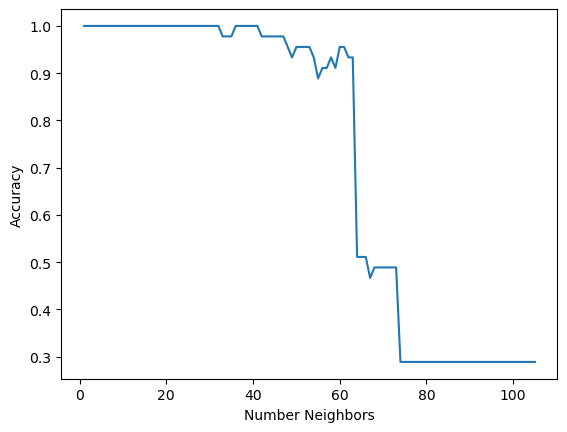

In [9]:
plt.plot(number_neighbors,accuracy_dict.values())
plt.xlabel("Number Neighbors")
plt.ylabel("Accuracy")
plt.show()

### **4.3. Árvore de Decisão**

[0.03822004 0.         0.06846677 0.89331319]
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


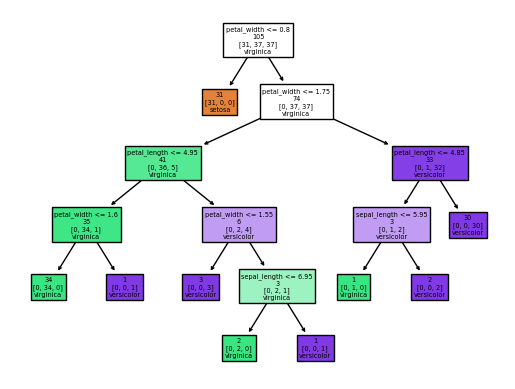

In [10]:
# Criando e treinando o modelo de Árvore de Decisão
def decision_tree_predict(x_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)

    # Fazendo previsões sobre o conjunto de dados de teste
    y_pred = model.predict(x_test)

    tree.plot_tree(model,
          feature_names = ['sepal_length',
                           'sepal_width',
                           'petal_length',
                           'petal_width'],
               class_names = ['setosa',
                              'virginica',
                              'versicolor'],
               impurity=False,
               label='none',
               filled=True)
    print(model.feature_importances_)
    return y_pred

y_pred = decision_tree_predict(x_train, y_train)

print(calculate_metrics(y_test, y_pred))

### **4.4. SVM**

In [11]:
# Criando e treinando o modelo SVM
def svm_predict(x_train, y_train):
  model = SVC()
  model.fit(x_train, y_train)

  # Fazendo previsões sobre o conjunto de dados de teste
  y_pred = model.predict(x_test)
  return y_pred

y_pred = svm_predict(x_train, y_train)

print(calculate_metrics(y_test, y_pred))

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


### **4.5. Redes Neurais Artificiais**

### **4.5.1. Perceptron**

In [12]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

# Treinando o modelo Perceptron
modelo = Perceptron()
modelo.fit(x_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(x_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6888888888888889

### **4.5.1. MLP**

## **5. Automatização do Treino e Validação**



In [17]:
import os

def load_and_prepare_data():
    from sklearn.datasets import load_iris
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []

    os.makedirs("models", exist_ok=True)

    for name, model in models.items():
        print(f"Training model: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='macro'),
            "Recall": recall_score(y_test, y_pred, average='macro'),
            "F1_Score": f1_score(y_test, y_pred, average='macro')
        }

        results.append(metrics)

        # Save model with English name and underscores
        file_name = name.lower().replace(" ", "_")
        joblib.dump(model, f"models/{file_name}.pkl")

    return pd.DataFrame(results)


models = {
    "logistic_regression": LogisticRegression(),
    "knn": KNeighborsClassifier(n_neighbors=3),
    "decision_tree": DecisionTreeClassifier(),
    "svm": SVC(kernel="linear"),
    "perceptron": Perceptron(),
    "mlp": MLPClassifier(max_iter=1000)
}

# Load data
X_train, X_test, y_train, y_test = load_and_prepare_data()

# Train and evaluate models
df_results = train_and_evaluate_models(models, X_train, X_test, y_train, y_test)

# Show results
print("\n📊 Model Evaluation Results:\n")
display(df_results.style.format({
    "Accuracy": "{:.4f}",
    "Precision": "{:.4f}",
    "Recall": "{:.4f}",
    "F1_Score": "{:.4f}"
}).set_properties(**{'text-align': 'center'}))

Training model: logistic_regression
Training model: knn
Training model: decision_tree
Training model: svm
Training model: perceptron
Training model: mlp

📊 Model Evaluation Results:



,Model,Accuracy,Precision,Recall,F1_Score
0,logistic_regression,1.0000,1.0000,1.0000,1.0000
1,knn,1.0000,1.0000,1.0000,1.0000
2,decision_tree,1.0000,1.0000,1.0000,1.0000
3,svm,0.9667,0.9722,0.9630,0.9659
4,perceptron,0.9667,0.9722,0.9630,0.9659
5,mlp,1.0000,1.0000,1.0000,1.0000
